In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
df = pd.read_csv('cars1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,7,2016,21995.0,2,28526.0,0,160,50.4,2.0
1,2,2015,13995.0,1,27016.0,0,30,62.8,2.0
2,2,2016,18498.0,2,29845.0,1,160,45.6,2.0
3,3,2017,20000.0,0,44783.0,0,145,62.8,2.0
4,7,2014,12300.0,0,43195.0,0,200,47.9,2.0
...,...,...,...,...,...,...,...,...,...
295,3,2017,18700.0,1,20052.0,1,145,49.6,2.0
296,3,2015,17498.0,2,35903.0,0,145,56.5,2.0
297,1,2019,19995.0,1,7307.0,0,145,51.4,1.6
298,7,2015,17498.0,2,40256.0,0,160,50.4,2.0


In [60]:
df['age']=(2021-df['year'])
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size,age
0,7,2016,21995.0,2,28526.0,0,160,50.4,2.0,5
1,2,2015,13995.0,1,27016.0,0,30,62.8,2.0,6
2,2,2016,18498.0,2,29845.0,1,160,45.6,2.0,5
3,3,2017,20000.0,0,44783.0,0,145,62.8,2.0,4
4,7,2014,12300.0,0,43195.0,0,200,47.9,2.0,7
...,...,...,...,...,...,...,...,...,...,...
295,3,2017,18700.0,1,20052.0,1,145,49.6,2.0,4
296,3,2015,17498.0,2,35903.0,0,145,56.5,2.0,6
297,1,2019,19995.0,1,7307.0,0,145,51.4,1.6,2
298,7,2015,17498.0,2,40256.0,0,160,50.4,2.0,6


In [61]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size,age
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3.860000,2016.903333,21126.687312,1.113333,25919.846724,0.463333,119.200000,52.994333,1.891333,4.096667
std,2.974878,1.642044,8793.663294,0.727268,19812.278562,0.499487,60.884176,10.396195,0.499423,1.642044
min,0.000000,2013.000000,7000.000000,0.000000,10.000000,0.000000,0.000000,32.800000,1.000000,1.000000
25%,1.000000,2016.000000,14993.750000,1.000000,10203.750000,0.000000,30.000000,47.100000,1.500000,3.000000
50%,3.000000,2017.000000,18970.000000,1.000000,22476.000000,0.000000,145.000000,50.400000,2.000000,4.000000
75%,7.000000,2018.000000,25991.250000,2.000000,35390.000000,1.000000,145.000000,61.400000,2.000000,5.000000
max,12.000000,2020.000000,48348.638730,2.000000,86477.003452,1.000000,300.000000,83.100000,3.000000,8.000000


In [62]:
df['priceLevel']=np.where (df['price']<=21126,0,1)
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size,age,priceLevel
0,7,2016,21995.0,2,28526.0,0,160,50.4,2.0,5,1
1,2,2015,13995.0,1,27016.0,0,30,62.8,2.0,6,0
2,2,2016,18498.0,2,29845.0,1,160,45.6,2.0,5,0
3,3,2017,20000.0,0,44783.0,0,145,62.8,2.0,4,0
4,7,2014,12300.0,0,43195.0,0,200,47.9,2.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...
295,3,2017,18700.0,1,20052.0,1,145,49.6,2.0,4,0
296,3,2015,17498.0,2,35903.0,0,145,56.5,2.0,6,0
297,1,2019,19995.0,1,7307.0,0,145,51.4,1.6,2,0
298,7,2015,17498.0,2,40256.0,0,160,50.4,2.0,6,0


In [63]:
# Splitting the dataset into the Training set and Test set
a=['model','type','distance','fuel','tax','miles per galoon','size', 'age']
X = df[a]
y = df['priceLevel']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [65]:
#Feature Selection
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.274454
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.567     
Dependent Variable: priceLevel       AIC:              147.7377  
Date:               2021-12-21 10:17 BIC:              175.5828  
No. Observations:   240              Log-Likelihood:   -65.869   
Df Model:           7                LL-Null:          -152.06   
Df Residuals:       232              LLR p-value:      7.8887e-34
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.7057      0.3192     2.2105    0.0271     0.0800     1.3314
x2     0.7352      0.2482     2.9621    0.0031     0.2

Больше всего влияют факторы 7 и 8, а менее всего - 4

In [66]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

5
[ True False  True False False  True  True  True]
[1 2 1 3 4 1 1 1]


In [67]:
#fitting logistic regression
# Leaving only Selected Features
X_train_select=X_train[:,[False, False,  False,  False, False, False, True, True]]
X_test_select=X_test[:,[False, False,  False,  False, False, False, True, True]]

In [68]:
X_train_select

array([[ 0.24231755,  1.07723409],
       [ 0.24231755,  0.47738216],
       [-1.00388699, -0.7223217 ],
       [-1.00388699,  0.47738216],
       [ 0.24231755,  0.47738216],
       [ 0.24231755, -1.32217363],
       [ 0.24231755, -0.12246977],
       [ 0.24231755, -1.32217363],
       [ 0.24231755, -0.12246977],
       [ 0.24231755, -0.12246977],
       [ 0.24231755,  0.47738216],
       [ 2.31932512, -0.7223217 ],
       [ 0.24231755, -0.12246977],
       [ 2.31932512,  1.07723409],
       [ 0.24231755,  0.47738216],
       [-1.41928851,  1.67708602],
       [-1.00388699, -0.12246977],
       [-1.00388699, -0.12246977],
       [-0.58848548,  0.47738216],
       [ 0.24231755, -0.12246977],
       [ 0.24231755, -0.12246977],
       [ 0.24231755, -1.32217363],
       [-1.00388699, -0.12246977],
       [ 0.24231755, -0.12246977],
       [ 0.24231755, -1.32217363],
       [-0.58848548, -0.12246977],
       [ 0.24231755,  1.67708602],
       [ 0.24231755,  1.07723409],
       [ 0.24231755,

In [69]:
# Fitting Logistic Regression to the Training set 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

In [70]:
# Predicting the Test set results
y_pred = lr.predict(X_test_select)
lr.score(X_test_select,y_test).round(3)

0.867

Данная модель имеет 13,3% ошибок

In [71]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28  3]
 [ 5 24]]


52 примеров корректны, 8 - нет

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


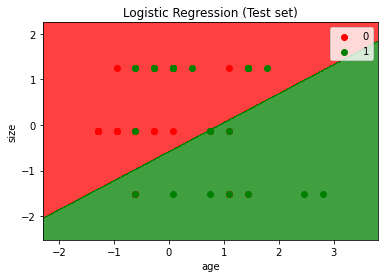

In [72]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('age')
plt.ylabel('size')
plt.legend()
plt.show()

In [73]:
import pickle
obj = {'X_train': X_train_select, 'X_test': X_test_select,'y_train': y_train,'y_test': y_test}
output = open('cars4.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()